In [36]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
#Impoting SF Data, create monthly graphs
sf_df = pd.read_csv("sf_merged_data.csv", parse_dates = ["starttime", "stoptime"])
del sf_df["Unnamed: 0"]

print(sf_df.shape)
sf_df["Date (YearMonth)"] = sf_df['starttime'].dt.strftime('%Y%m')
sf_df["Date"] = sf_df['starttime'].dt.strftime('%Y%m%d')
sf_df["Month"] = sf_df['starttime'].dt.strftime('%m').astype(int)
sf_df["Year"] = sf_df['starttime'].dt.strftime('%Y').astype(int)

#SF Only
sf_df["Precipitation_modified"] = sf_df['Pecipitation'].replace(to_replace = "T", value = np.nan).astype(float)

sf_df.head()

/Users/yannielee/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(669959, 15)


,tripduration,starttime,start station name,start station id,stoptime,end station name,end station id,bikeid,usertype,city,weather key,max temp,min temp,avg wind,Pecipitation,Date (YearMonth),Date,Month,Year,Precipitation_modified
0,63,2013-08-29 14:13:00,South Van Ness at Market,66,2013-08-29 14:14:00,South Van Ness at Market,66,520,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308,20130829,8,2013,0.0
1,70,2013-08-29 14:42:00,San Jose City Hall,10,2013-08-29 14:43:00,San Jose City Hall,10,661,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308,20130829,8,2013,0.0
2,71,2013-08-29 10:16:00,Mountain View City Hall,27,2013-08-29 10:17:00,Mountain View City Hall,27,48,Subscriber,Mountain View,2013082994041,80.0,64.0,5.0,0,201308,20130829,8,2013,0.0
3,77,2013-08-29 11:29:00,San Jose City Hall,10,2013-08-29 11:30:00,San Jose City Hall,10,26,Subscriber,San Jose,2013082995113,81.0,63.0,7.0,0,201308,20130829,8,2013,0.0
4,83,2013-08-29 12:02:00,South Van Ness at Market,66,2013-08-29 12:04:00,Market at 10th,67,319,Subscriber,San Francisco,2013082994107,74.0,61.0,11.0,0,201308,20130829,8,2013,0.0


In [182]:
unique = np.unique(sf_df['starttime'])
print(unique)

['2013-08-29T02:08:00.000000000-0700' '2013-08-29T02:24:00.000000000-0700'
 '2013-08-29T02:25:00.000000000-0700' ...,
 '2015-08-31T16:11:00.000000000-0700' '2015-08-31T16:13:00.000000000-0700'
 '2015-08-31T16:26:00.000000000-0700']


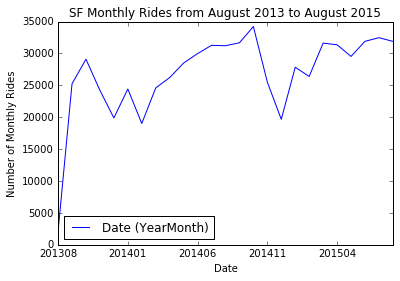

In [179]:
#Overview
sf_df.describe()

sf_df.groupby(['Date (YearMonth)']).agg({'Date (YearMonth)': np.count_nonzero}).plot()
plt.plot(legend=None)
plt.xlabel("Date")
plt.ylabel("Number of Monthly Rides")
plt.title("SF Monthly Rides from August 2013 to August 2015")
plt.savefig('SF_Rides Per Month Summary.png')




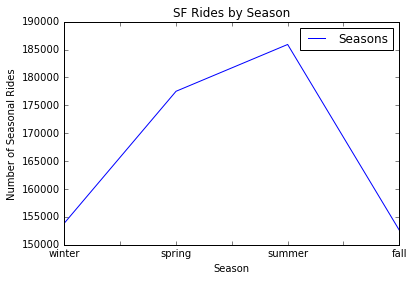

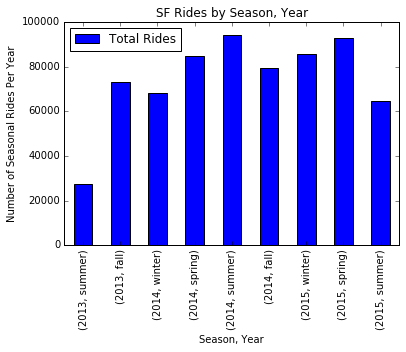

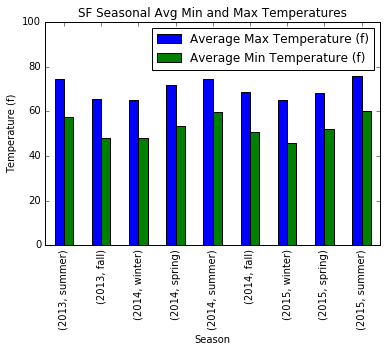

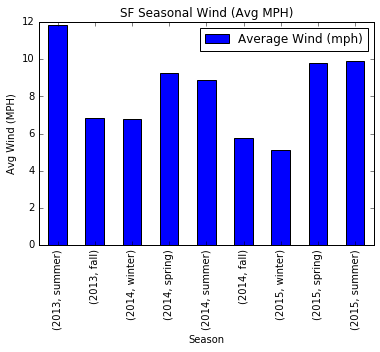

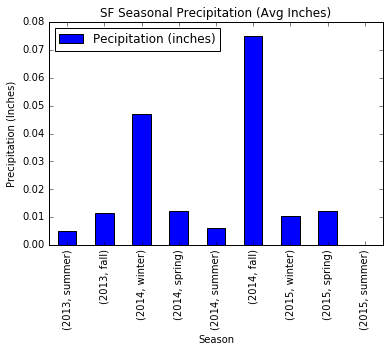

In [183]:
#How do seasons affect ridership? 
ranges = [0,3,6,9,12]
labels = ['winter','spring','summer','fall']
sf_df['Seasons'] = pd.cut(sf_df["Month"], ranges, labels=labels).astype('category')
sf_df.groupby(['Seasons']).agg({'Seasons': np.count_nonzero}).plot()
plt.xlabel("Season")
plt.ylabel("Number of Seasonal Rides")
plt.title("SF Rides by Season")
plt.savefig('SF_Seasonal_Rides.png')

#Number of rides per season
sf_df.groupby(['Year','Seasons']).agg({'Seasons': np.count_nonzero}).rename(columns={'Seasons' : 'Total Rides'}).plot(kind='bar')
plt.xlabel("Season, Year")
plt.ylabel("Number of Seasonal Rides Per Year")
plt.title("SF Rides by Season, Year")
plt.savefig('SF_Year_Seasonal_Rides.png')

#Average Temps
sf_df.groupby(['Year','Seasons']).agg({'max temp': np.mean, 'min temp': np.mean}).rename(columns={'max temp' : 'Average Max Temperature (f)', 'min temp' : 'Average Min Temperature (f)'}).plot(kind='bar')
plt.ylabel("Number of Seasonal Rides Per Year")
plt.xlabel("Season")
plt.ylabel("Temperature (f)")
plt.title("SF Seasonal Avg Min and Max Temperatures")
plt.savefig('SF_Seasonal_Min_Max_Temp.png')
plt.gca().set_ylim([0,100])

#average wind
sf_df.groupby(['Year','Seasons']).agg({'avg wind' : np.mean}).rename(columns={'avg wind' : 'Average Wind (mph)'}).plot(kind='bar')
plt.xlabel("Season")
plt.ylabel("Avg Wind (MPH)")
plt.title("SF Seasonal Wind (Avg MPH)")
plt.savefig('SF_Seasonal_Avg_Wind.png')

#Precipitation
#**add y axis name here
sf_df.groupby(['Year','Seasons']).agg({'Precipitation_modified' : np.mean}).rename(columns={'Precipitation_modified' : 'Pecipitation (inches)'}).plot(kind='bar')
plt.xlabel("Season")
plt.ylabel("Precipitation (Inches)")
plt.title("SF Seasonal Precipitation (Avg Inches)")
plt.savefig('SF_Seasonal_Precipitation.png')


(array([ 709.,   12.,    7.,    3.,    1.,    0.,    0.,    0.,    0.,    1.]),
 array([ 0.        ,  0.31071963,  0.62143925,  0.93215888,  1.2428785 ,
         1.55359813,  1.86431776,  2.17503738,  2.48575701,  2.79647664,
         3.10719626]),
 <a list of 10 Patch objects>)

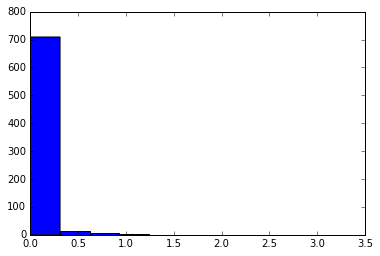

In [74]:
#Understanding weather distribution
#sf_df.groupby(['Date']).agg({'max temp':[np.count_nonzero, np.mean, np.std], 'min temp': [np.count_nonzero, np.mean, np.std]})

sf_precip = sf_df.groupby(['Date']).agg({'Precipitation_modified':[np.mean, np.std]})
plt.hist(sf_precip["Precipitation_modified"]["mean"])

            count_nonzero  rides per day
max_temp                                
(0, 45]                 0            NaN
(45, 50]                1     274.000000
(50, 55]               14     618.928571
(55, 60]               57     723.263158
(60, 65]              162     814.320988
(65, 70]              177     949.163842
(70, 75]              194     957.463918
(75, 80]               80    1060.350000
(80, 85]               29    1108.206897
(85, 90]               12     921.250000
(90, 100]               7     871.857143
(100, 200]              0            NaN
          count_nonzero  rides per day
min_temp                              
(20, 30]              0            NaN
(30, 40]             33     726.666667
(40, 45]             80     808.850000
(45, 50]            153     856.150327
(50, 55]            220     937.077273
(55, 60]            153     986.183007
(60, 70]             94     991.882979
(70, 80]              0            NaN


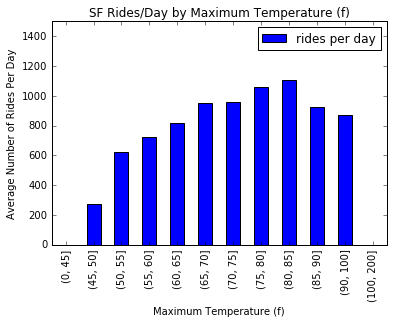

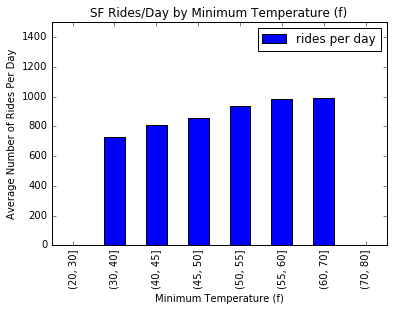

In [190]:
#How does temperature affect ridership? 
#How do seasons affect ridership?  max temp	min temp
#sf_df.groupby(['max temp']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
#sf_df.groupby(['min temp']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')

sf_maxtemp = sf_df.groupby(['Date']).agg({'max temp':[np.mean], 'Seasons':[np.count_nonzero]})
sf_maxtemp.columns = sf_maxtemp.columns.droplevel(0)
ranges = [0,45,50,55,60,65,70,75,80,85,90,100,200]
sf_maxtemp['max_temp'] = pd.cut(sf_maxtemp["mean"], ranges).astype('category')
sf_maxtemp = sf_maxtemp.groupby(['max_temp']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
sf_maxtemp.columns = sf_maxtemp.columns.droplevel(0)
sf_maxtemp["rides per day"] = sf_maxtemp["sum"] / sf_maxtemp["count_nonzero"]
del sf_maxtemp["sum"]
print(sf_maxtemp.head(20))
del sf_maxtemp["count_nonzero"]
sf_maxtemp.plot(kind='bar')
plt.gca().set_ylim([0,1500])
plt.xlabel("Maximum Temperature (f)")
plt.ylabel("Average Number of Rides Per Day")
plt.title("SF Rides/Day by Maximum Temperature (f)")

sf_mintemp = sf_df.groupby(['Date']).agg({'min temp':[np.mean], 'Seasons':[np.count_nonzero]})
sf_mintemp.columns = sf_mintemp.columns.droplevel(0)
ranges = [20,30,40,45,50,55,60,70,80]
sf_mintemp['min_temp'] = pd.cut(sf_mintemp["mean"], ranges).astype('category')
sf_mintemp = sf_mintemp.groupby(['min_temp']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
sf_mintemp.columns = sf_mintemp.columns.droplevel(0)
sf_mintemp["rides per day"] = sf_mintemp["sum"] / sf_mintemp["count_nonzero"]
del sf_mintemp["sum"]
print(sf_mintemp.head(20))
del sf_mintemp["count_nonzero"]
sf_mintemp.plot(kind='bar')
plt.gca().set_ylim([0,1500])
plt.xlabel("Minimum Temperature (f)")
plt.ylabel("Average Number of Rides Per Day")
plt.title("SF Rides/Day by Minimum Temperature (f)")


               count_nonzero  rides per day
Precipitation                              
(-0.1, 0]                622     939.250804
(0, 1]                   107     782.233645
(1, 2]                     3     646.333333


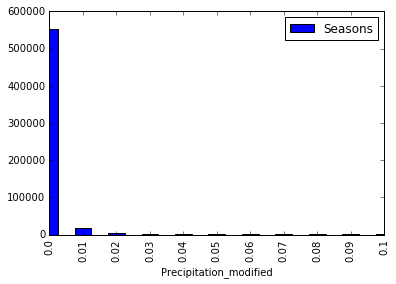

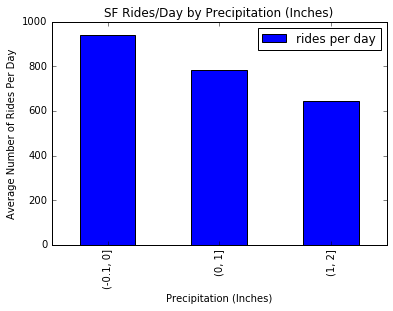

In [193]:
#How does precipitation affect ridership? Pecipitation
#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
sf_df.groupby(['Precipitation_modified']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
plt.gca().set_xlim([0,10])
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')
#Precipitation = np.unique(sf_df['Precipitation_modified'])
#print(Precipitation)

sf_precip = sf_df.groupby(['Date']).agg({'Precipitation_modified':[np.mean], 'Seasons':[np.count_nonzero]})
sf_precip.columns = sf_precip.columns.droplevel(0)
ranges = [-0.1,0,1,2]
sf_precip['Precipitation'] = pd.cut(sf_precip["mean"], ranges).astype('category')
sf_precip = sf_precip.groupby(['Precipitation']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
sf_precip.columns = sf_precip.columns.droplevel(0)
sf_precip["rides per day"] = sf_precip["sum"] / sf_precip["count_nonzero"]
del sf_precip["sum"]
print(sf_precip.head(10))
del sf_precip["count_nonzero"]
sf_precip.plot(kind='bar')
plt.xlabel("Precipitation (Inches)")
plt.ylabel("Average Number of Rides Per Day")
plt.title("SF Rides/Day by Precipitation (Inches)")
#plt.savefig('NYC_Seasonal_Precipitation.png')

In [ ]:
#How do extreme weather events affect ridership? 


           count_nonzero  rides per day
avg_wind                               
(0, 5]               173     877.184971
(5, 10]              375     959.698667
(10, 15]             166     846.753012
(15, 20]              17     945.705882
(20, 100]              2     840.500000


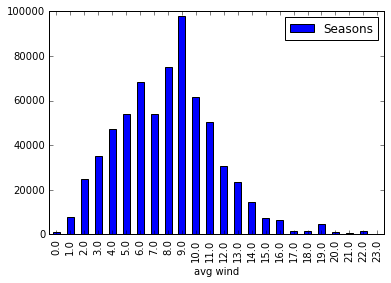

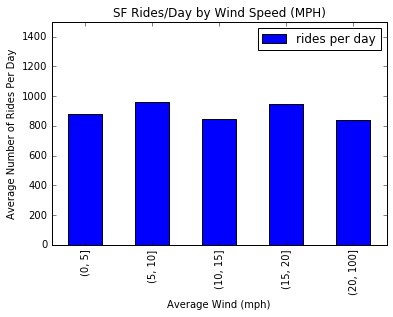

In [192]:
#How does wind affect ridership? avg wind

#ranges = [0,3,6,9,12]
#labels = ['winter','spring','summer','fall']
sf_df.groupby(['avg wind']).agg({'Seasons': np.count_nonzero}).plot(kind='bar')
#plt.xlabel("Season")
#plt.ylabel("Number of Seasonal Rides")
#plt.title("SF Rides by Season")
#plt.savefig('SF_Seasonal_Rides.png')


sf_wind = sf_df.groupby(['Date']).agg({'avg wind':[np.mean], 'Seasons':[np.count_nonzero]})
sf_wind.columns = sf_wind.columns.droplevel(0)
ranges = [0,5,10,15,20,100]
sf_wind['avg_wind'] = pd.cut(sf_wind["mean"], ranges).astype('category')
sf_wind = sf_wind.groupby(['avg_wind']).agg({'count_nonzero':[np.sum, np.count_nonzero]})
sf_wind.columns = sf_wind.columns.droplevel(0)
sf_wind["rides per day"] = sf_wind["sum"] / sf_wind["count_nonzero"]
del sf_wind["sum"]
print(sf_wind.head(8))
del sf_wind["count_nonzero"]
sf_wind.plot(kind='bar')
plt.gca().set_ylim([0,1500])
plt.xlabel("Average Wind (MPH)")
plt.ylabel("Average Number of Rides Per Day")
plt.title("SF Rides/Day by Wind Speed (MPH)")

